In [1]:
sample_overhead = 70  # bytes   # proof, encoding, etc.
points_per_sample = 16
sample_content_size = 32*points_per_sample  # bytes       # data contents only

data_blob_size = 512 * 1024  # bytes
data_blob_interval = 12  # seconds
sample_requests_per_blob = 30   # number of samples a single node should do per blob    # TODO old num from V
node_count = 10_000
avg_peers_per_node = 2000

sample_size = sample_overhead + sample_content_size

data_avail_throughput = data_blob_size / data_blob_interval
sample_count_per_blob = data_blob_size / sample_content_size
sample_throughput = sample_count_per_blob / data_blob_interval   # samples / second (on chain, unextended)
outgoing_requests_rate = sample_requests_per_blob / data_blob_interval   # sample requests / second (single node)

outgoing_bandwidth = outgoing_requests_rate * sample_size   # incoming is expected to be the same (ignoring search overhead)

# data recovery by extending the data 2x for redundancy
extended_sample_throughput = sample_throughput * 2   # samples / second (on network, extended)

total_requests_rate = outgoing_requests_rate * node_count   # sample requests / second (all nodes combined)
avg_queries_per_sample = total_requests_rate / extended_sample_throughput  # sample requests / sample

# need to hide 50% for samples to not be recoverable
attack_hiding_factor = 0.50
# individual nodes may get adaptive answers on queries, we can only count on honest nodes.
# (we assume validators are evenly distributed between nodes here)
validating_nodes_ratio = 2.0 / 3.0

validating_nodes = node_count * validating_nodes_ratio


In [2]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [8]:
num_simulations = 500


TODO: implement monte carlo experiment to approximate sampling security (tricky by formula, because each node makes k distinct random requests, but nodes are otherwise randomly overlapping)
Probability that a builder cannot answer to any 51% of the samples should be minimal. `k` can be adjusted, and the expected minimum honest node count requesting samples must be determined.

In [9]:
block_time = 16
samples_per_blob = 512
points_per_sample = 16
max_blobs_per_block = 512
samples_per_block = max_blobs_per_block * samples_per_blob
print('samples total:', samples_per_block)

samples total: 262144


In [10]:
sample_size = 512 #bytes

# Simulation 1: Minimum number of sampling clients
- `t` clients make `k-out-of-samples_per_block` random samples
- builder node can have a small probability to miss request
- find the smallest value `t` for which at least `samples_per_block / 2` were successful

In [11]:
k = 75

(0.0, 10000.0)

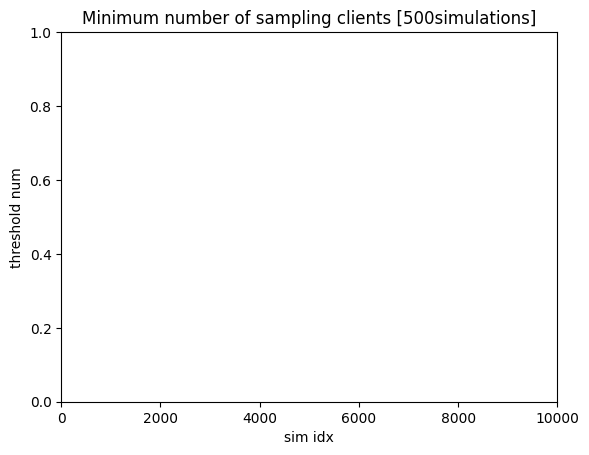

In [12]:
# Creating Figure for Simulation Balances
fig = plt.figure()
plt.title("Minimum number of sampling clients [" + str(num_simulations) + "simulations]")
plt.xlabel("sim idx")
plt.ylabel("threshold num")
plt.xlim([0, node_count])

100%|██████████| 500/500 [23:32<00:00,  2.83s/it]  


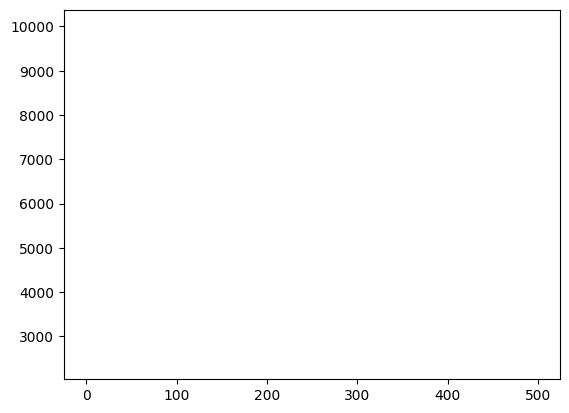

In [13]:
threshold_count = []
for i in tqdm(range(num_simulations)):
    sampled_map = {}
    for node_idx in range(node_count):
        sample_indexes = random.sample(range(1, samples_per_block), k)
        for sample_idx in sample_indexes:
            sampled_map[sample_idx] = True
        if len(sampled_map.keys()) * 2 > samples_per_block:
            threshold_count.append(node_idx)
            plt.plot(i, node_idx)

In [14]:
# Showing the plot after the simulations are finished
plt.show()

# Averaging win probability and end balance
overall_threshold_count = sum(threshold_count)/len(threshold_count)
# Displaying the averages
print("Average win probability after " + str(num_simulations) + "runs: " + str(overall_threshold_count))

Average win probability after 500runs: 6210.407037358818


# Simulation 2: DHT reliability
- Builder sends `n` samples to random node
    - repeats this until `samples_per_block / n`
- receiver node has random probability `x` to drop incoming package
- find the biggest value `x` for which more than `samples_per_block / 2` were successful

In [ ]:
for i in tqdm(range(num_simulations)):
